In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs  
import glob
import metpy.calc as mpcalc
from metpy.units import units


In [3]:
in_data

NameError: name 'in_data' is not defined

Text(0.5, 1.0, 'Wind Speed and Direction at 1000 hPa at 15:00 LT')

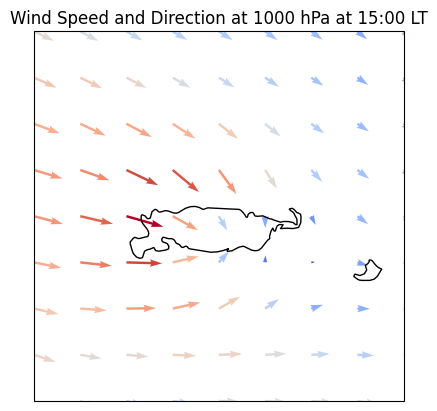

In [54]:

in_data = glob.glob('/home1/nalex2023/Datasets/era5_manus/climt/*.nc')

level = 1000
time = 15
dset_seasonal = xr.open_dataset(in_data[1]).sel(latitude=slice(-1,-3),longitude=slice(146,148))

dset_seasonal['u'] = dset_seasonal['u'].roll(hour=10)
dset_seasonal['v'] = dset_seasonal['v'].roll(hour=10)

dset_seasonal['speed'] = mpcalc.wind_speed(dset_seasonal.u,dset_seasonal.v)
dset_seasonal['direction'] = mpcalc.wind_direction(dset_seasonal.u,dset_seasonal.v) 


fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
ax.set_extent([146,148,-3,-1])
#dset_seasonal.speed.sel(pressure_level=1000,hour=15).plot(ax=ax)
x = dset_seasonal.longitude
y = dset_seasonal.latitude
z = dset_seasonal.speed.sel(pressure_level=level,hour=time)
c = dset_seasonal.direction.sel(pressure_level=level,hour=time)
u = dset_seasonal.u.sel(pressure_level=level,hour=time)
v = dset_seasonal.v.sel(pressure_level=level,hour=time)
#dset_seasonal.speed.sel(pressure_level=level,hour=time).plot(ax=ax,cmap='RdBu_r',transform=ccrs.PlateCarree())
ax.quiver(x,y,u,v,z,transform=ccrs.PlateCarree(),cmap='coolwarm')
#ax.barbs(x,y,u,v,length=5,transform=ccrs.PlateCarree())
ax.coastlines()

ax.set_title('Wind Speed and Direction at 1000 hPa at 15:00 LT')


In [43]:
dset_seasonal

<xarray.Dataset> Size: 94kB
Dimensions:         (hour: 24, pressure_level: 3, latitude: 9, longitude: 9)
Coordinates:
    number          int64 8B ...
  * pressure_level  (pressure_level) float64 24B 1e+03 900.0 800.0
  * latitude        (latitude) float64 72B -1.0 -1.25 -1.5 ... -2.5 -2.75 -3.0
  * longitude       (longitude) float64 72B 146.0 146.2 146.5 ... 147.8 148.0
  * hour            (hour) int64 192B 0 1 2 3 4 5 6 7 ... 17 18 19 20 21 22 23
Data variables:
    u               (hour, pressure_level, latitude, longitude) float32 23kB ...
    v               (hour, pressure_level, latitude, longitude) float32 23kB ...
    speed           (hour, pressure_level, latitude, longitude) float32 23kB ...
    direction       (hour, pressure_level, latitude, longitude) float32 23kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-23T22:34 GRIB to CDM+CF via cfgrib-0.9.1...

Text(0.5, 0.98, 'MAM Diurnal climatology of wind speed and direction at 1000 hPa (Local Time)')

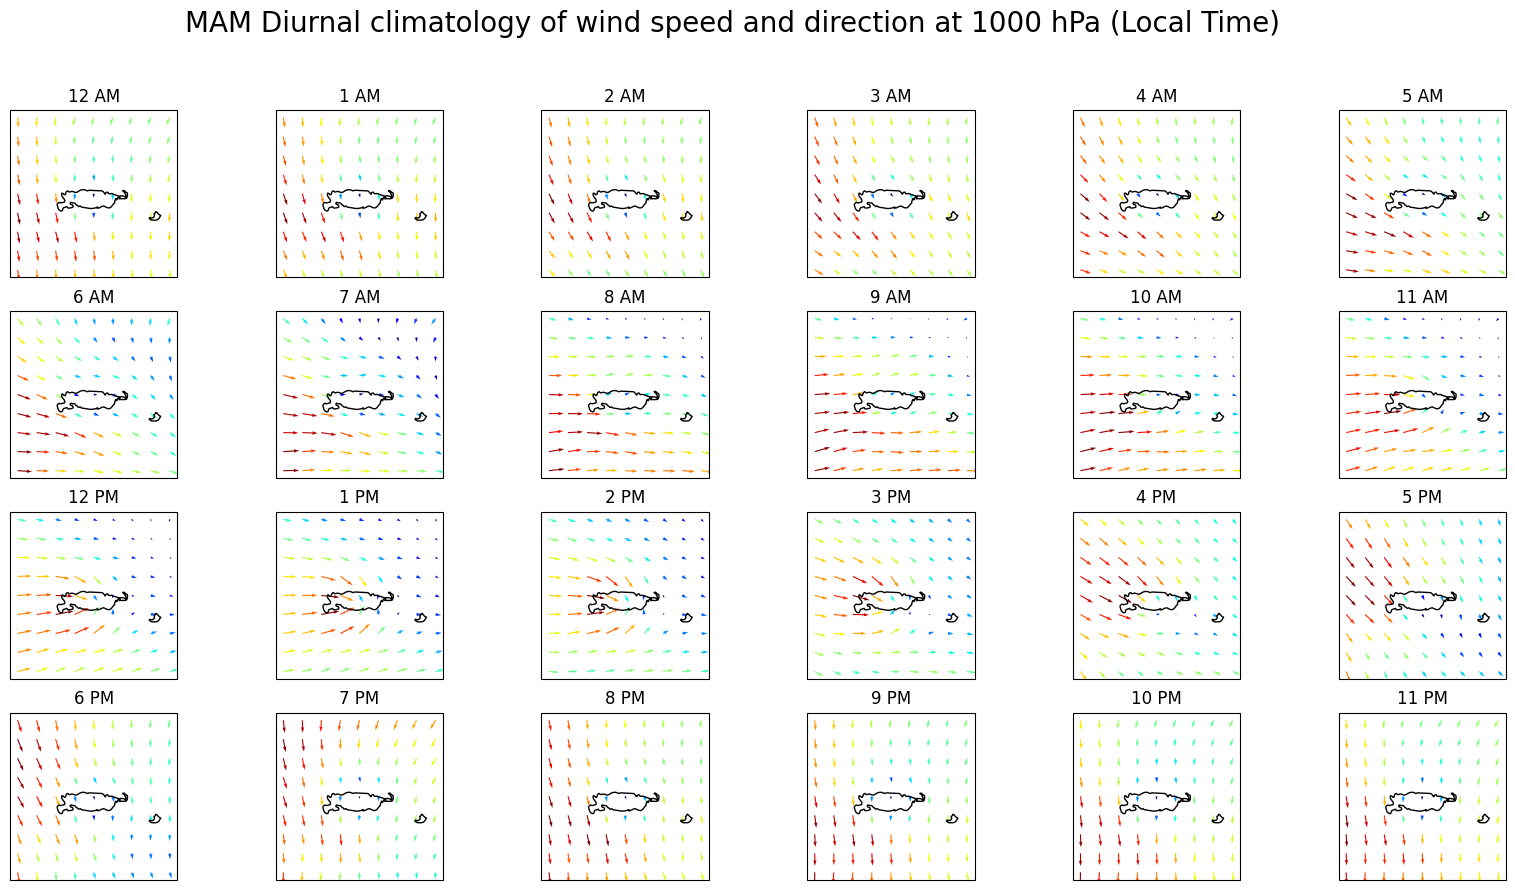

In [50]:
fig,ax = plt.subplots(4,6,subplot_kw={'projection':ccrs.PlateCarree()},figsize=(20,10))

axs = ax.flatten()
level=1000
for i in range(24):
    x = dset_seasonal.longitude
    y = dset_seasonal.latitude
    z = dset_seasonal.speed.sel(pressure_level=level,hour=i)
    c = dset_seasonal.direction.sel(pressure_level=level,hour=i)
    u = dset_seasonal.u.sel(pressure_level=level,hour=i)
    v = dset_seasonal.v.sel(pressure_level=level,hour=i)
    #dset_seasonal.speed.sel(pressure_level=level,hour=i).plot(ax=axs[i],cmap='RdBu_r',transform=ccrs.PlateCarree())
    axs[i].quiver(x,y,u,v,z,transform=ccrs.PlateCarree(),cmap='jet')
    axs[i].coastlines()
    hour_in_ampm = i%12
    if hour_in_ampm == 0:
        hour_in_ampm = 12
    if i < 12:
        axs[i].set_title(f'{hour_in_ampm} AM')
    else:
        axs[i].set_title(f'{hour_in_ampm} PM')

fig.suptitle('MAM Diurnal climatology of wind speed and direction at 1000 hPa (Local Time)',fontsize=20)

Text(0.5, 0.98, 'ERA5 Diurnal Cycle at 1000 hPa 12-year Climatology (Local Time)')

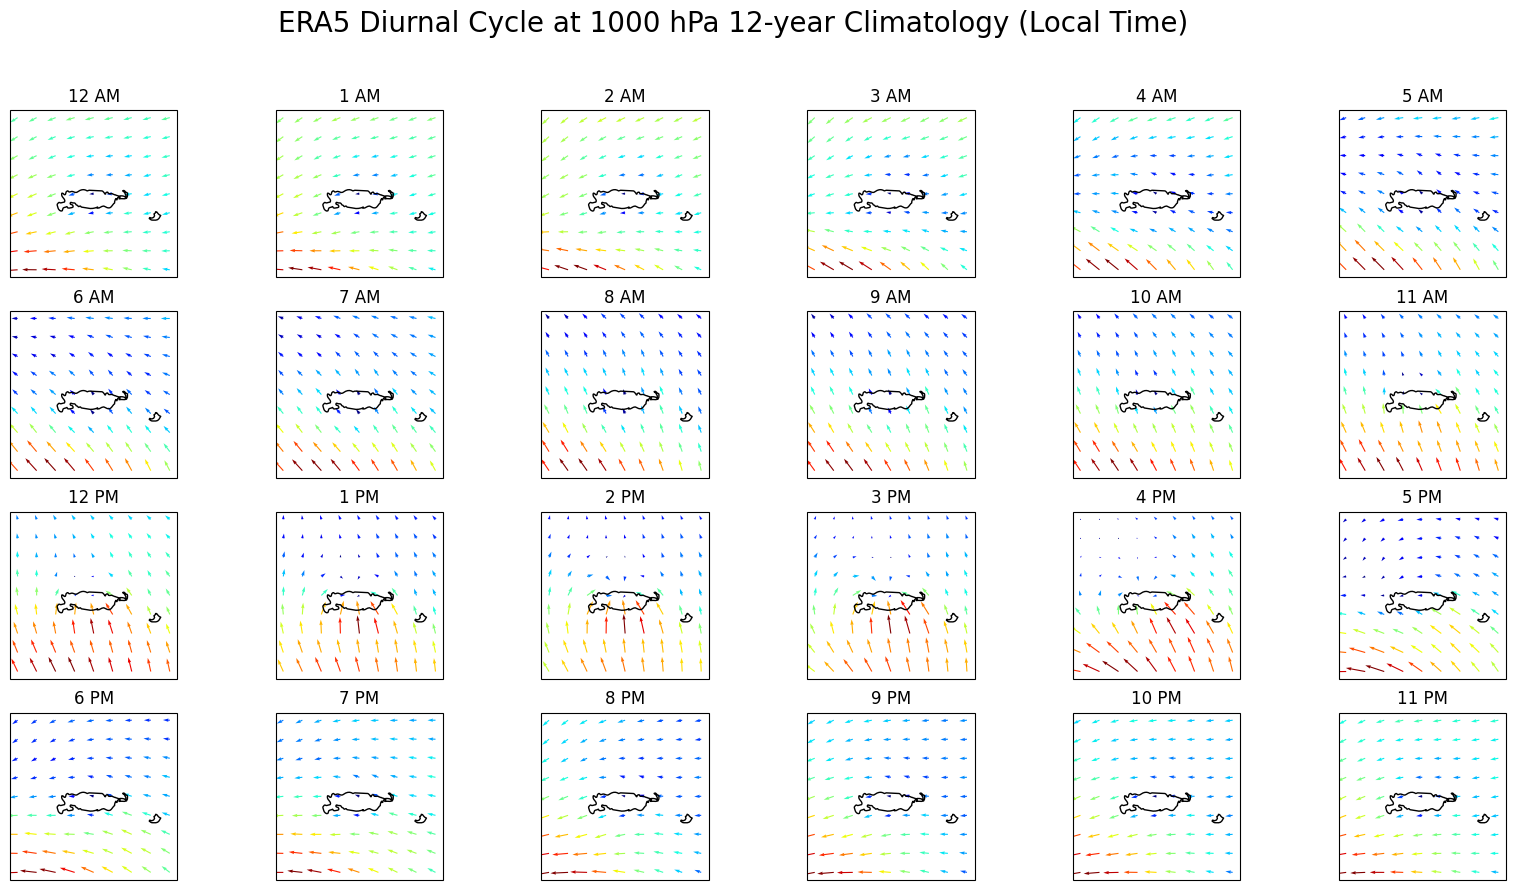

In [56]:
comple_diurnal = '/home1/nalex2023/Datasets/LSB_OUTS/era5_manus_diurnal.nc'

dset_diurnal = xr.open_dataset(comple_diurnal).sel(latitude=slice(-1,-3),longitude=slice(146,148))


dset_diurnal['u'] = dset_diurnal['u'].roll(hour=10)
dset_diurnal['v'] = dset_diurnal['v'].roll(hour=10)



dset_diurnal['speed'] = mpcalc.wind_speed(dset_diurnal.u,dset_diurnal.v)
dset_diurnal['direction'] = mpcalc.wind_direction(dset_diurnal.u,dset_diurnal.v)


level = 1000

fig,ax = plt.subplots(4,6,subplot_kw={'projection':ccrs.PlateCarree()},figsize=(20,10))

axs = ax.flatten()

for i in range(24):
    x = dset_diurnal.longitude
    y = dset_diurnal.latitude
    z = dset_diurnal.speed.sel(pressure_level=level,hour=i)
    c = dset_diurnal.direction.sel(pressure_level=level,hour=i)
    u = dset_diurnal.u.sel(pressure_level=level,hour=i)
    v = dset_diurnal.v.sel(pressure_level=level,hour=i)
    #dset_diurnal.speed.sel(pressure_level=level,hour=i).plot(ax=axs[i],cmap='RdBu_r',transform=ccrs.PlateCarree())
    axs[i].quiver(x,y,u,v,z,transform=ccrs.PlateCarree(),cmap='jet')
    axs[i].coastlines()
    hour_in_ampm = i%12
    if hour_in_ampm == 0:
        hour_in_ampm = 12
    if i < 12:
        axs[i].set_title(f'{hour_in_ampm} AM')
    else:
        axs[i].set_title(f'{hour_in_ampm} PM')

fig.suptitle('ERA5 Diurnal Cycle at 1000 hPa 12-year Climatology (Local Time)',fontsize=20)


# MET CLIMATE DIURNALS 

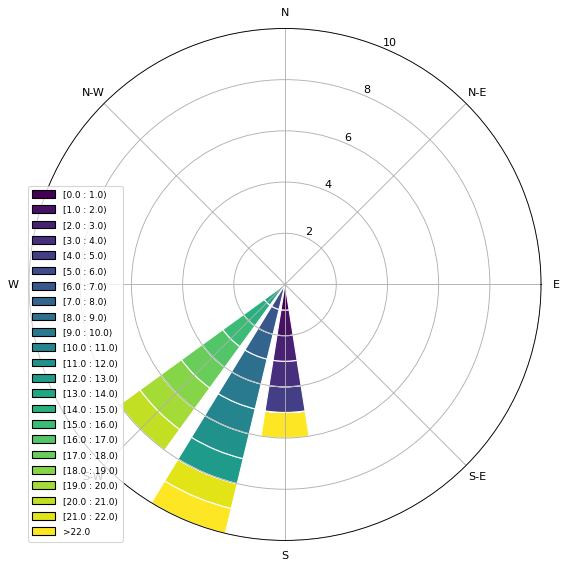

In [4]:
in_dir1 = '/home1/nalex2023/Datasets/LSB_OUTS/'

met_diurnal_com = xr.open_dataset(in_dir1+'met_arm_diurnal_2000_2013_complete.nc')

import seaborn as sns
from windrose import WindroseAxes, plot_windrose
import pandas as pd
from scipy import interpolate
# 24 wind roses for each hour of the day


wspd = met_diurnal_com['wspd_arith_mean'].roll(hour=10)
wdir = met_diurnal_com['wdir_vec_mean'].roll(hour=10)
hour = met_diurnal_com['hour'].roll(hour=10)

dft_winds = pd.DataFrame({'wspd':wspd,'wdir':wdir,'hour':hour})


ax = WindroseAxes.from_ax()

ax.bar(dft_winds.wdir,dft_winds.hour,bins=np.arange(0,23,1),normed=False,opening=0.8,edgecolor='white')
ax.set_legend()

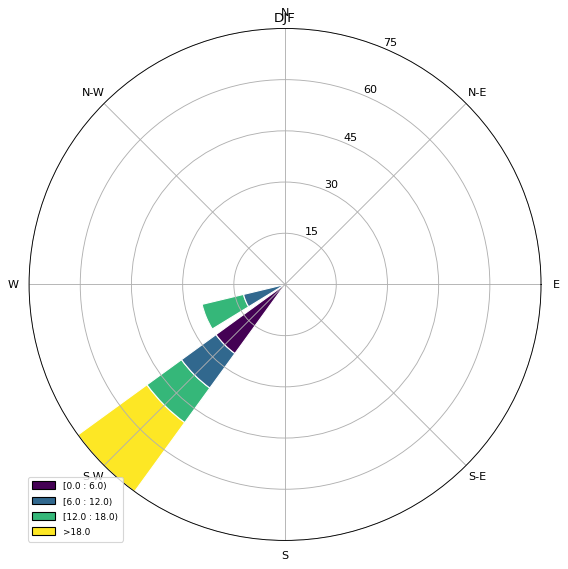

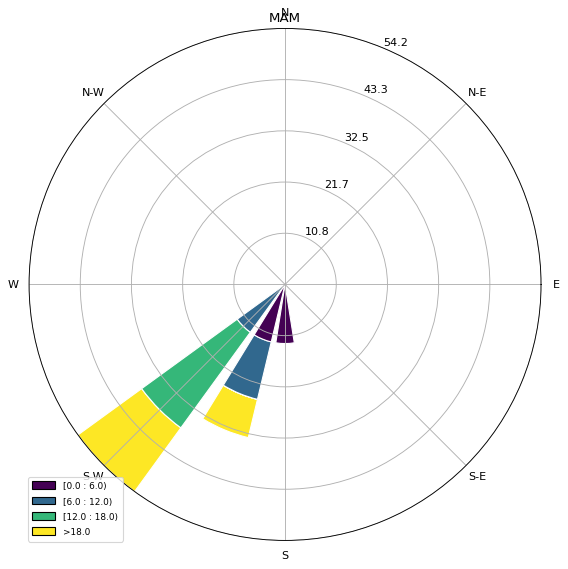

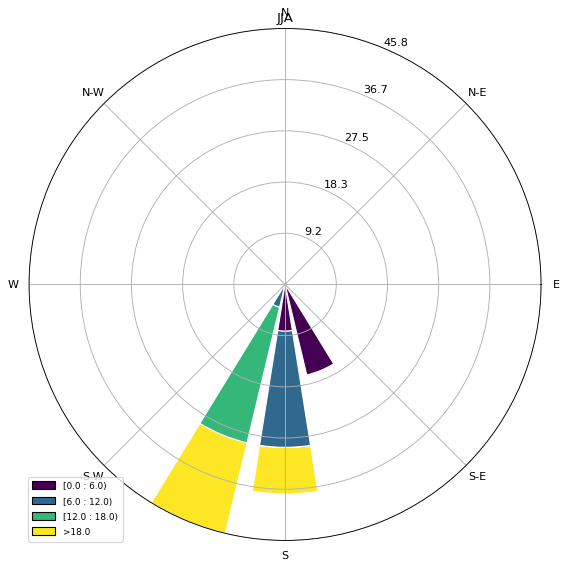

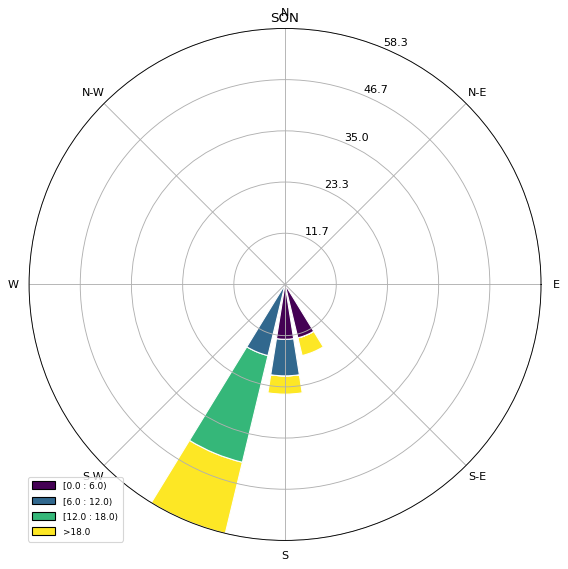

In [5]:
met_diurnal_sesonal = xr.open_dataset(in_dir1+'met_arm_diurnal_2000_2013_seasonal.nc')

seasons = ['DJF','MAM','JJA','SON']


for i in range(4):
    ax = WindroseAxes.from_ax()
    wspd = met_diurnal_sesonal['wspd_arith_mean'].sel(season=seasons[i])
    wdir = met_diurnal_sesonal['wdir_vec_mean'].sel(season=seasons[i])
    hour = met_diurnal_sesonal['hour']
    dft_winds = pd.DataFrame({'wspd':wspd,'wdir':wdir,'hour':hour})
    ax.bar(dft_winds.wdir,dft_winds.hour,bins=np.arange(0,24,6),normed=True,opening=0.8,edgecolor='white',label=seasons[i])
    ax.set_legend()
    ax.set_title(seasons[i])
    

# MET intepsonde diurnal



<BarContainer object of 24 artists>

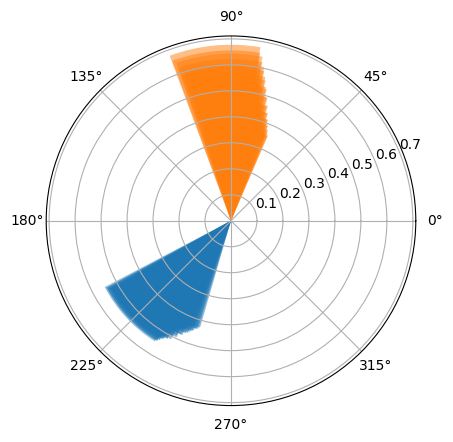

In [24]:
met_interp_complet_diurnal = xr.open_dataset(in_dir1+'diurnal_climate_interp_complete_2001_2014.nc')


met_interp_complet_diurnal['speed'] = mpcalc.wind_speed(met_interp_complet_diurnal.u_wind,met_interp_complet_diurnal.v_wind)

met_interp_complet_diurnal['direction'] = mpcalc.wind_direction(met_interp_complet_diurnal.u_wind,met_interp_complet_diurnal.v_wind)

wspd_interp = met_interp_complet_diurnal['speed'].roll(hour=10)
wdir_interp = met_interp_complet_diurnal['direction'].roll(hour=10)



width = np.radians(30)
wd1 = np.radians(wdir_interp.sel(height=0,method='nearest'))
wd2 = np.radians(wdir_interp.sel(height=4,method='nearest'))


fig,ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.bar(wd1,wspd_interp.sel(height=0,method='nearest'),label='Surface',width=width,alpha=0.5)

ax.bar(wd2,wspd_interp.sel(height=2,method='nearest'),label='4 km',width=width,alpha=0.5)

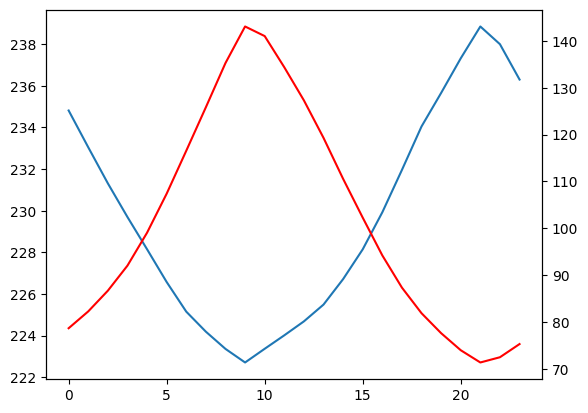

In [28]:
fig,ax = plt.subplots()

ax.plot(wdir_interp.sel(height=0,method='nearest'),label='Surface')

ax2 = ax.twinx()

ax2.plot(wdir_interp.sel(height=1,method='nearest'),color='red',label='Surface Wind Speed')


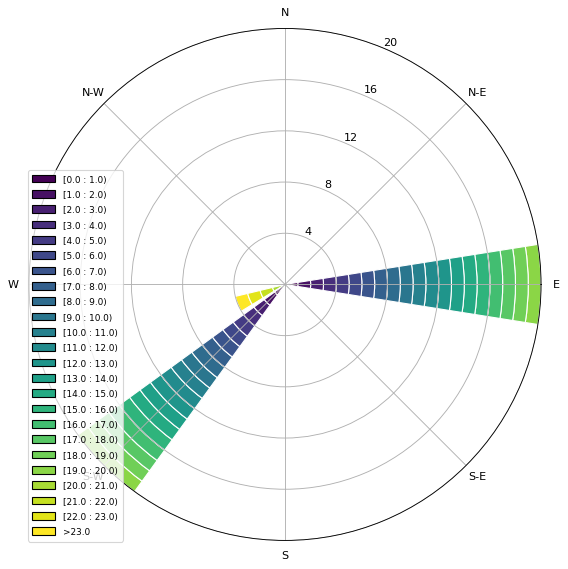

In [40]:


# Example: Wind direction data (degrees) for two datasets
hours = np.arange(24)  # 0-23 hours
wind_dir1 = wdir_interp.sel(height=0,method='nearest') 
wind_dir2 = wdir_interp.sel(height=4,method='nearest')


ax = WindroseAxes.from_ax()

ax.bar(wind_dir1,hours,bins=np.arange(0,24,1),normed=False,opening=0.8,edgecolor='white',label='Surface')
ax.set_legend()

ax.bar(wind_dir2,hours,bins=np.arange(0,24,1),normed=False,opening=0.8,edgecolor='white',label='4 km')